In [205]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from tqdm import tqdm

In [206]:
h=0.01
L=6.0
X = np.arange(-L,L+h,h)

def f(x,e):
    return (x**2-e)
def y(x,e):
    return 1-(h**2/12)*f(x,e)

In [3]:
def Numerov(x0,xf,p0,p1,e):
    psi=[p0,p1]
    xs=[x0,x0+h]
    n=int((xf-x0)/h)
    state=0
    for i in range(1,n):
        #psih=((psi[i]*(12-10*y(X[i],e))-y(X[i-1],e)*psi[i-1])/y(X[i+1],e))
        
        psih=((psi[i]*(12-10*y(X[i],e))-y(X[i-1],e)*psi[i-1])/y(X[i+1],e))
        xsh=xs[i]+h
        psi.append(psih)
        xs.append(xsh)
        if psi[i]*psi[i+1]<0:
            state=state+1
    return xs,psi,psi[-1],state      

The energy eigenvalue is :  4.999999997206032
Energy correspond to 2 excited state


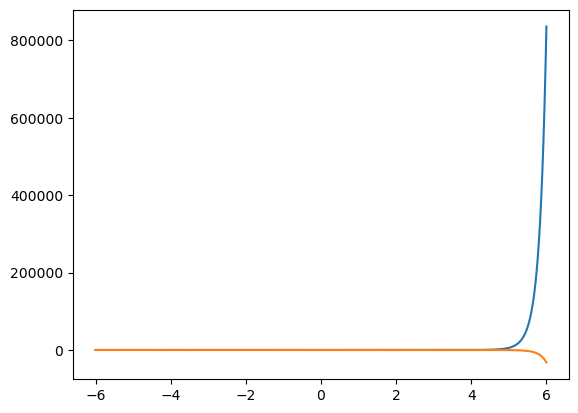

In [4]:
a=4 ## Initial guess for value of  first derivative at first boundary
b=6
tolerance=0.000000001
midpoint=0
xs1,psi1,q1,n1=Numerov(-L,L,0,0.0000001,a)
xs2,psi2,q2,n2=Numerov(-L,L,0,0.0000001,b)

plt.plot(X,psi1)
plt.plot(X,psi2)

if q1*q2>0:
    print('choose right values of a and b')
else:
    while(abs(b-a)>tolerance):
        xs1,psi1,q1,n1=Numerov(-L,L,0,0.0000001,a)
        xs2,psi2,q2,n2=Numerov(-L,L,0,0.0000001,b)
        midpoint=(a+b)/2
        xsm,psim,qm,nm=Numerov(-L,L,0,0.0000001,midpoint)
        if q1*qm<0:
            b=midpoint
        if q2*qm<0:
            a=midpoint
    print("The energy eigenvalue is : ",midpoint)
    print("Energy correspond to",nm,"excited state")

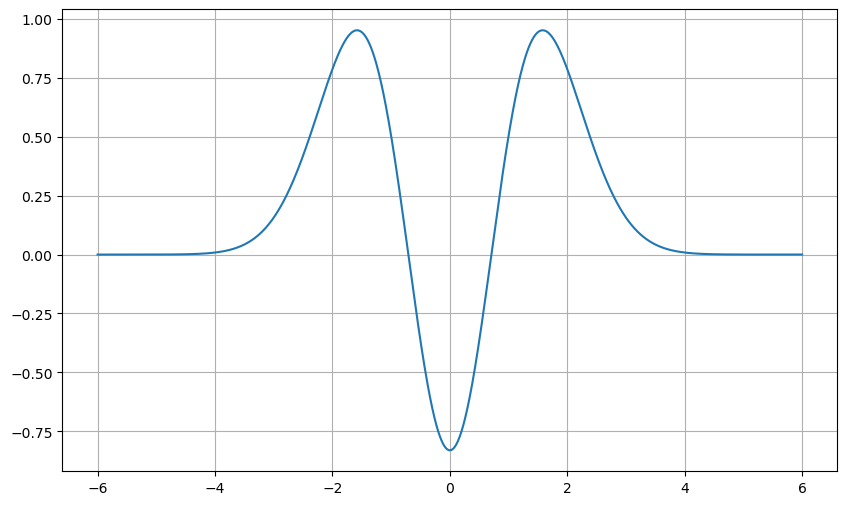

In [5]:
xsm,psim,qm,nm=Numerov(-L,L,0,0.0000001,midpoint)
plt.figure(figsize=(10,6))
plt.plot(xsm,psim)
plt.grid()

# TRYING THE SAME THING

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
from tqdm import tqdm

In [2]:
h=0.01
L=5
X=np.arange(-L,L+h,h)

def f(x,e):
    return (x**2-e)
def y(x,e):
    return  1-(h**2/12)*f(x,e)
    

In [3]:
def Numerov(x0,xf,p0,p1,e):
    psi=[p0,p1]
    xs=[x0,x0+h]
    n=int((xf-x0)/h)
    state=0
    for i in range (1,n):
        psih=((psi[i]*(12-10*y(X[i],e))-y(X[i-1],e)*psi[i-1])/y(X[i+1],e))
        xsh=xs[i]+h
        psi.append(psih)
        xs.append(xsh)
        if psi[i]*psi[i+1]<0:
            state =state +1
    return xs,psi,psi[-1],state

The energy eigenvalue is :  5.000000953674316
Energy correspond to 3 excited state


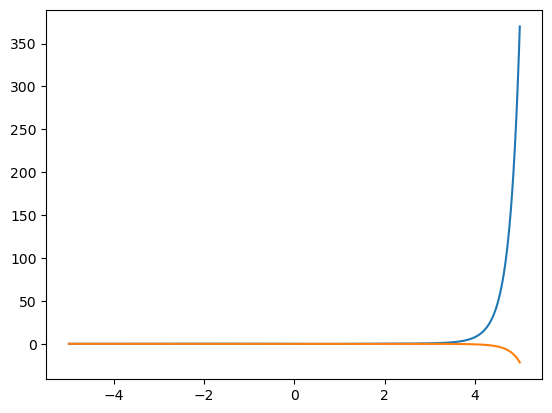

In [4]:
a=4
b=6
tol=0.000001
midpoint =0
xs1,psi1,q1,n1=Numerov(-L,L,0,0.000001,a)
xs2,psi2,q2,n2=Numerov(-L,L,0,0.000001,b)

plt.plot(X,psi1)
plt.plot(X,psi2)

if q1*q2>0:
     print('choose right values of a and b')
else:
    while(abs(b-a)>tol):
        xs1,psi1,q1,n1=Numerov(-L,L,0,0.000001,a)
        xs2,psi2,q2,n2=Numerov(-L,L,0,0.000001,b)
        midpoint=(a+b)/2
        xsm,psim,qm,nm=Numerov(-L,L,0,0.000001,midpoint)
        if q1*qm<0:
            b=midpoint
        if q2*qm<0:
            a=midpoint
            
    print("The energy eigenvalue is : ",midpoint)
    print("Energy correspond to",nm,"excited state")
        
    


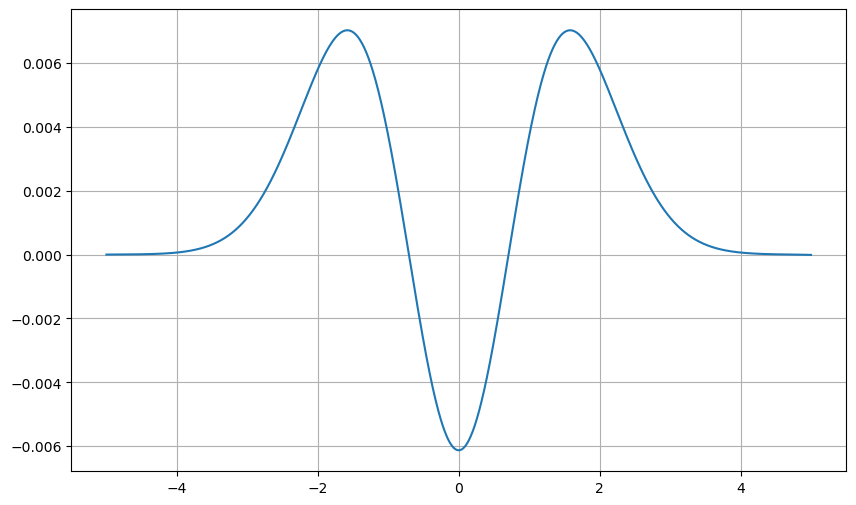

In [5]:
xsm,psim,qm,nm=Numerov(-L,L,0,0.0000001,midpoint)
plt.figure(figsize=(10,6))
plt.plot(xsm,psim)
plt.grid()

# TRYING ALL POTENTIALS

In [250]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as lin
plt.style.use("seaborn-whitegrid")
%matplotlib inline



C:\Users\Ancy ADaniel\AppData\Local\Temp\ipykernel_8336\900880696.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [282]:
delta=0.01
L=6
N=int(L/delta)
x=np.linspace(-6,6,2*N+1)


In [283]:
def kronecker(i,j):
    return 1 if i==j else 0

# radial

In [284]:
# # use 1,2*N+2
# def V(y):
#     if y!=0:
#         return -2/y
# #iske loiye ci2 =1

# shm

In [285]:
#(-N,N+1)
# def V(y):
#     return y**2 
#iske loiye ci2 =1

# step

In [286]:
# V0=100
# def V(y):
#     if abs(y)<= 0.5:
#         return -V0
#     else:
#         return 0

# double well

In [294]:
# take L=3

a=10*1.6*10**(-19)
b=2*10**(-10)
h=6.626*10**(-34)  ## Planck constant
h_cut=h/(2*np.pi)
m=9.1*10**(-31)   ## Mass of electron (in kg)
E0=(h_cut**2)/(2*m*b**2)  ## Natural enrgy scale
alpha =  a/E0


def V(y):
    return alpha*(y**2-1)**2

In [295]:

def h(i,j):
    return ((-kronecker(i+1,j) +2*kronecker(i,j)-kronecker(i-1,j))/(delta**2))+V(delta*i)*kronecker(i,j)


In [296]:
H=np.array([[h(i,j) for i in range (-N,N+1)] for j in range (-N,N+1)])
H_eigenvalues,H_eigenvectors=lin.eig(H)
idx=H_eigenvalues.argsort()
H_eigenvalues=H_eigenvalues[idx]
H_eigenvectors=H_eigenvectors[:,idx]

In [297]:
H

array([[ 32830.52195922, -10000.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [-10000.        ,  32742.76512731, -10000.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        , -10000.        ,  32655.45507135, ...,
             0.        ,      0.        ,      0.        ],
       ...,
       [     0.        ,      0.        ,      0.        , ...,
         32655.45507135, -10000.        ,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
        -10000.        ,  32742.76512731, -10000.        ],
       [     0.        ,      0.        ,      0.        , ...,
             0.        , -10000.        ,  32830.52195922]])

In [305]:

potential=0.001*np.array([V(delta*i) for i in range (-N,N+1)])

In [306]:
psi0=H_eigenvectors[:,0]
psi1=H_eigenvectors[:,1]

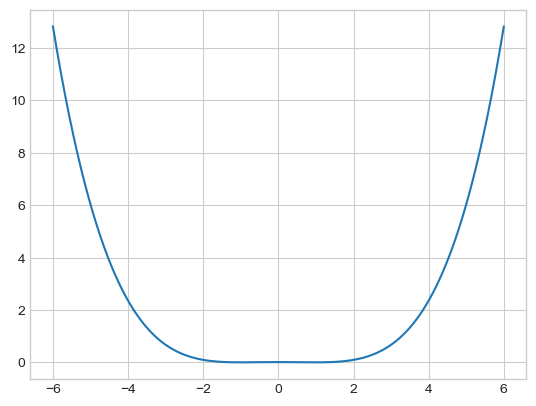

In [307]:
plt.plot(x,potential)
#plt.ylim(-10,10)

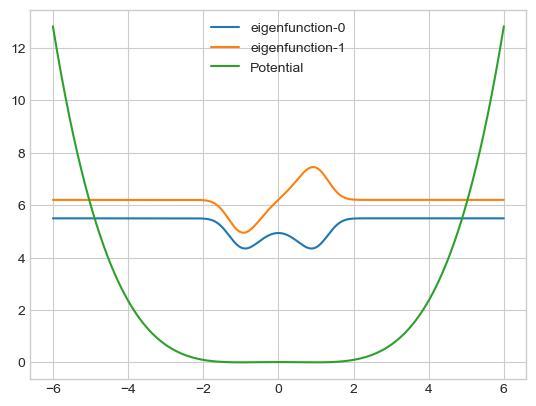

In [313]:
plt.plot(x,psi0*15+H_eigenvalues[0]*1,label="eigenfunction-0")
#plt.axhline(y=H_eigenvalues[0]*10,ls="--")
plt.plot(x,psi1*15+H_eigenvalues[1]*1,label="eigenfunction-1")
plt.plot(x,potential,label="Potential")
plt.legend()

In [314]:
# #only for radial
# for i in range(0,2):
#     plt.plot(x,(H_eigenvectors[:,i]*15)*x+H_eigenvalues[i])

In [315]:
psi0.conj().T
nc=np.dot(psi0.conj().T,psi0)
print(nc)

0.9999999999999998


In [316]:
# V=5
# E=5
# h_bar=1.054*10**-34
# m=9.1*10**-31
# l0=2*10**-9
# E0=((h_bar*2)/(2*m*l02))/(1.6*10*-19)
# v=V/E0
# e=E/E0
# p0=(E/E0)**.5
# p0,E0,v
p0=10
a=1
b=0
def PSI0(z):
    return (1/pow(np.pi*(a**2),0.25))*np.exp(-((z-b)**2)/(2.0*a**2) - 1j*p0*z)

C:\jupyter\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


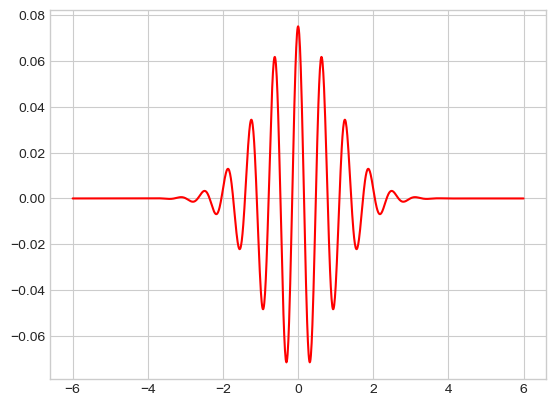

In [317]:
Psi0_m= np.sqrt(delta)*PSI0(x)
plt.plot(x, Psi0_m,'r')

In [318]:
def c(i):
    coeff = np.vdot(Psi0_m, H_eigenvectors[:,i])
    return coeff

C=[]
for i in range(2*N+1):
    C.append(c(i))
    
sum=0
for i in range(0,len(C)):
    sum += abs(C[i])**2
print("sum of ci squares=",sum)

sum of ci squares= 1.0000000000000067


In [319]:
ci=[c(i) for i in range(0,2*N+1)]
C=0
for i in range(0,2*N+1):
    C=C+abs(ci[i])**2
print(C)

1.0000000000000067


In [320]:
def Psi(t): # computes the wavepacket at time tau
    summation = np.zeros((2*N+1), dtype = 'complex')
    for i in range(N):
        summation += abs(C[i]*np.exp(-1.0j*H_eigenvalues[i]*t)*H_eigenvectors[:,i])
    return summation

In [321]:
def Prob(t):
    return abs(Psi(t))**2

In [322]:
def Prob(t):
    return abs(Psi(t))**2

In [323]:
plt.plot(x, Prob(0),'red')
plt.plot(x, Prob(1.),'black')
plt.plot(x, Prob(1.4),'blue')
#plt.plot(x,0.01*U/20)

IndexError: invalid index to scalar variable.